# 환경 데이터 분석 및 시각화

## 분석 목표
1. **인구밀도에 따른 오염물질 농도 분석** (CO, NO2, SO2, O3, 미세먼지)
2. **산업단지 면적 비율에 따른 오염물질 농도 분석**
3. **산업단지 면적과 인구밀도의 관계 분석**

---

In [2]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

print("라이브러리 로드 완료!")


라이브러리 로드 완료!


In [3]:
# 데이터 읽기 함수 정의
def table_reader(xls_path, header, end=None, sheet=None): 
    """Excel 파일을 읽어오는 함수"""
    if sheet is not None:
        df = pd.read_excel(xls_path, header=header, sheet_name=sheet)
    else:
        df = pd.read_excel(xls_path, header=header)
    if end is not None:
        df = df.iloc[:end]
    return df

print("데이터 읽기 함수 정의 완료!")

데이터 읽기 함수 정의 완료!


In [4]:
# 1. 대기오염물질 데이터 로드
print("대기오염물질 데이터 로드 중...")

so2 = table_reader('raw_files/대기농도.xlsx', header=3, end=19)
no2 = table_reader('raw_files/대기농도.xlsx', header=25, end=19)
o3 = table_reader('raw_files/대기농도.xlsx', header=47, end=19)
co = table_reader('raw_files/대기농도.xlsx', header=69, end=19)

print("✓ SO2, NO2, O3, CO 데이터 로드 완료")
print(f"SO2 데이터 크기: {so2.shape}")
print(f"컬럼: {so2.columns.tolist()[:5]}...")  # 처음 5개 컬럼만 표시

대기오염물질 데이터 로드 중...
✓ SO2, NO2, O3, CO 데이터 로드 완료
SO2 데이터 크기: (19, 24)
컬럼: ['연도', '‘01년', '‘02년', '‘03년', '‘04년']...


In [8]:
# 2. 미세먼지 등급 데이터 로드
print("미세먼지 등급 데이터 로드 중...")

pm10 = table_reader('raw_files/시도별_미세먼지_등급별_일수.xlsx', header=[4,5], end=19)
pm25 = table_reader('raw_files/시도별_미세먼지_등급별_일수.xlsx', header=[27,28], end=19)

print("✓ PM10, PM2.5 데이터 로드 완료")
print(f"PM2.5 데이터 크기: {pm25.shape}")
print("PM2.5 컬럼:", pm25.columns.tolist())

미세먼지 등급 데이터 로드 중...
✓ PM10, PM2.5 데이터 로드 완료
PM2.5 데이터 크기: (19, 43)
PM2.5 컬럼: [('좋음', '지역'), ('좋음', '2015년'), ('좋음', '2016년'), ('좋음', '2017년'), ('좋음', '2018년'), ('좋음', '2019년'), ('좋음', '2020년'), ('좋음', '2021년'), ('좋음', '2022년'), ('좋음', '2023년'), ('좋음', '2023년.1'), ('보통', '지역'), ('보통', '2015년'), ('보통', '2016년'), ('보통', '2017년'), ('보통', '2018년'), ('보통', '2019년'), ('보통', '2020년'), ('보통', '2021년'), ('보통', '2022년'), ('보통', '2023년'), ('보통', '2023년.1'), ('나쁨', '지역'), ('나쁨', '2015년'), ('나쁨', '2016년'), ('나쁨', '2017년'), ('나쁨', '2018년'), ('나쁨', '2019년'), ('나쁨', '2020년'), ('나쁨', '2021년'), ('나쁨', '2022년'), ('나쁨', '2023년'), ('나쁨', '2023년.1'), ('매우나쁨', '지역'), ('매우나쁨', '2015년'), ('매우나쁨', '2016년'), ('매우나쁨', '2017년'), ('매우나쁨', '2018년'), ('매우나쁨', '2019년'), ('매우나쁨', '2020년'), ('매우나쁨', '2021년'), ('매우나쁨', '2022년'), ('매우나쁨', '2023년')]


In [9]:
# 3. 인구밀도 및 산업단지 데이터 로드
print("인구밀도 및 산업단지 데이터 로드 중...")

population = table_reader('raw_files/지역별_인구밀도.xlsx', header=[2,3], end=19)
industry = table_reader('raw_files/산업단지현황조사_2023년 4분기.xlsx', header=[6,7], sheet=1)

print("✓ 인구밀도 데이터 로드 완료")
print(f"인구밀도 데이터 크기: {population.shape}")
print("✓ 산업단지 데이터 로드 완료") 
print(f"산업단지 데이터 크기: {industry.shape}")

# 데이터 확인
print("\n인구밀도 데이터 샘플:")
print(population.head(3))

인구밀도 및 산업단지 데이터 로드 중...
✓ 인구밀도 데이터 로드 완료
인구밀도 데이터 크기: (19, 3)
✓ 산업단지 데이터 로드 완료
산업단지 데이터 크기: (85, 14)

인구밀도 데이터 샘플:
  Unnamed: 0_level_0    2023        
  Unnamed: 0_level_1      인구    인구밀도
0                  계  51,713     515
1                 서울   9,400  15,533
2                 부산   3,284   4,258


In [11]:
# 4. 데이터 통합 및 정리
print("데이터 통합 중...")

# 분석할 지역 목록
regions = ['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', 
           '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']

# 대기오염물질 농도 데이터 병합
pollution_data = pd.DataFrame({
    'region': regions,
    'SO2': so2[so2['연도'].isin(regions)]["'23년"].values,
    'NO2': no2[no2['연도'].isin(regions)]["'23년"].values,
    'O3': o3[o3['연도'].isin(regions)]["'23년"].values,
    'CO': co[co['연도'].isin(regions)]["'23년"].values
})

# 미세먼지 나쁨 비율 계산
pm25_filtered = pm25.iloc[1:18]  # 전국 제외, 지역별 데이터만
pm25_total = pm25_filtered[[('좋음','2023년'), ('보통','2023년'), ('나쁨','2023년'), ('매우나쁨','2023년')]].sum(axis=1)
pm25_bad_ratio = (pm25_filtered[('나쁨','2023년')] + pm25_filtered[('매우나쁨','2023년')]) / pm25_total * 100
pollution_data['PM25_bad_ratio'] = pm25_bad_ratio.values
print("✓ 오염물질 데이터 통합 완료")
print(f"통합 데이터 크기: {pollution_data.shape}")
print("\n오염물질 데이터 샘플:")
print(pollution_data.head())

데이터 통합 중...
✓ 오염물질 데이터 통합 완료
통합 데이터 크기: (17, 6)

오염물질 데이터 샘플:
  region     SO2     NO2      O3    CO  PM25_bad_ratio
0     서울  0.0028  0.0204   0.031  0.45       11.232877
1     부산  0.0027  0.0141  0.0327  0.32        9.589041
2     대구   0.002  0.0151   0.031  0.36        4.657534
3     인천  0.0032  0.0186   0.033  0.47        7.397260
4     광주  0.0026  0.0137  0.0334  0.42       10.958904


In [12]:
# 5. 면적 데이터 로드
print("시도별 면적 데이터 로드 중...")

area = table_reader('raw_files/지역별_면적.xlsx', header=16, sheet=0)
area.columns = ["시도별", "면적", "비율"]

area['시도별'] = regions
area = area.drop('비율', axis=1)

# 데이터 확인
print("\n면적 데이터 샘플:")
print(area.head(3))

시도별 면적 데이터 로드 중...

면적 데이터 샘플:
  시도별    면적
0  서울   605
1  부산   771
2  대구  1499


In [ ]:
import re
# 6. 인구밀도 및 산업단지 데이터 추가 (에러 수정)
print("인구밀도 및 산업단지 데이터 추가 중...")

# 인구밀도 데이터 정리 및 추가
pop_filtered = population.iloc[1:18].reset_index(drop=True)  # 전국 제외
population_density_raw = pop_filtered[('2023', '인구밀도')]

# 데이터 정리 (안전한 형변환)
if not pop_filtered[('2023', '인구밀도')].isnull().any():
    population_density_clean = pop_filtered[('2023', '인구밀도')]\
                    .astype(str).replace({'-': '0', '': '0'})\
                    .str.replace(',', '').astype(float)

pollution_data['population_density'] = population_density_clean

# 산업단지 면적 비율 데이터 정리 및 추가
# mask = industry[('구분', 'Unnamed: 0_level_1')].str.contains('소계', na=False)
# tmp_df = pd.DataFrame()
# tmp_df['시도별'] = industry.loc[mask, ('구분', 'Unnamed: 0_level_1')].str.replace('소계', '', regex=False).str.strip().reset_index(drop=True)
# tmp_df['지정면적'] = industry.loc[mask, ('지정면적', 'Unnamed: 2_level_1')].reset_index(drop=True)
# tmp_df['단지수'] = industry.loc[mask, ('단지수', 'Unnamed: 1_level_1')].reset_index(drop=True).str.extract(r'(\d+)').astype(int)
# tmp_df = tmp_df.merge(area[['시도별', '면적']], on='시도별', how='left', sort=False)


df = industry[[('구분', 'Unnamed: 0_level_1'), ('지정면적', 'Unnamed: 2_level_1'), ('단지수', 'Unnamed: 1_level_1')]].copy()
df.columns = ['구분', '지정면적', '단지수']
df['원래_지정면적'] = pd.to_numeric(df['지정면적'], errors='coerce').fillna(0)
df['시도별'] = df['구분'].apply(lambda x: next((r for r in regions if r in x), None))
df['유형'] = df['구분'].str.replace('|'.join(regions), '', regex=True).str.strip()
df['단지수'] = df['단지수'].astype(str)
df['단지수_숫자'] = df['단지수'].apply(lambda x: sum(int(n) for n in re.findall(r'\d+', x)))

filtered_df = df[df['유형'].isin(['국가', '일반'])]
result = (
    filtered_df
    .groupby('시도별', as_index=False)
    .agg({
        '원래_지정면적': 'sum',
        '단지수_숫자': 'sum'
    })
    .rename(columns={
        '원래_지정면적': '지정면적',
        '단지수_숫자': '단지수'
    })
)

tmp_df = tmp_df = area.merge(result[['시도별', '지정면적', '단지수']], on='시도별', how='left')
area_ratio = tmp_df['지정면적']*0.001 / tmp_df['면적']*100

pollution_data['number_of_industry'] = tmp_df['단지수']
pollution_data['industry_area_ratio'] = area_ratio

# 모든 오염물질 데이터도 숫자형으로 변환
for col in ['SO2', 'NO2', 'O3', 'CO', 'PM25_bad_ratio']:
    pollution_data[col] = pollution_data[col].astype(float)

print("✓ 모든 데이터 정리 및 통합 완료!")
print(f"최종 데이터 크기: {pollution_data.shape}")

# 데이터 타입 확인
print("\n데이터 타입 확인:")
display(pollution_data.dtypes)

# NaN이나 무한대 값 체크
print("\n데이터 품질 체크:")
print("NaN 값 개수:", pollution_data.isnull().sum().sum())
print("무한대 값 체크:", np.isinf(pollution_data.select_dtypes(include=[np.number])).sum().sum())

print("\n최종 통합 데이터:")
display(pollution_data)

print("\n기본 통계:")
display(pollution_data.describe())

인구밀도 및 산업단지 데이터 추가 중...
✓ 모든 데이터 정리 및 통합 완료!
최종 데이터 크기: (17, 9)

데이터 타입 확인:


region                  object
SO2                    float64
NO2                    float64
O3                     float64
CO                     float64
PM25_bad_ratio         float64
population_density     float64
number_of_industry       int64
industry_area_ratio    float64
dtype: object


데이터 품질 체크:
NaN 값 개수: 0
무한대 값 체크: 0

최종 통합 데이터:


,region,SO2,NO2,O3,CO,PM25_bad_ratio,population_density,number_of_industry,industry_area_ratio
0,서울,0.0028,0.0204,0.0310,0.45,11.232877,15533.0,4,0.542975
1,부산,0.0027,0.0141,0.0327,0.32,9.589041,4258.0,33,5.782231
2,대구,0.0020,0.0151,0.0310,0.36,4.657534,2666.0,17,2.929153
3,인천,0.0032,0.0186,0.0330,0.47,7.397260,2820.0,16,2.017338
4,광주,0.0026,0.0137,0.0334,0.42,10.958904,2921.0,11,6.376248
5,대전,0.0026,0.0163,0.0306,0.37,5.479452,2731.0,4,9.845370
6,울산,0.0034,0.0162,0.0332,0.47,7.123288,1041.0,27,8.602446
7,세종,0.0027,0.0139,0.0303,0.45,4.383562,833.0,14,2.534194
8,경기,0.0024,0.0167,0.0306,0.40,9.315068,1351.0,181,2.443824
9,강원,0.0021,0.0094,0.0331,0.38,12.602740,91.0,26,0.110368



기본 통계:


,SO2,NO2,O3,CO,PM25_bad_ratio,population_density,number_of_industry,industry_area_ratio
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,0.002541,0.013347,0.032976,0.391765,7.477840,2112.176471,46.176471,2.880792
std,0.000480,0.003724,0.002725,0.052110,3.317169,3696.799853,50.172497,2.955324
min,0.001500,0.006800,0.030000,0.280000,2.191781,91.000000,3.000000,0.110368
25%,0.002100,0.010400,0.031000,0.370000,4.657534,220.000000,14.000000,1.189631
50%,0.002600,0.013900,0.033000,0.390000,7.397260,833.000000,27.000000,1.740366
75%,0.002800,0.016200,0.033400,0.420000,10.684932,2731.000000,79.000000,2.929153
max,0.003400,0.020400,0.041500,0.470000,12.602740,15533.000000,181.000000,9.845370


In [9]:
# 이상치 확인은 어떻게 할까...
# 이상치 행만 모아 컬럼별로 딕셔너리로 저장
outlier_dict = {}
num_cols = pollution_data.select_dtypes(include=[np.number]).columns

for col in num_cols:
    Q1 = pollution_data[col].quantile(0.25)
    Q3 = pollution_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = pollution_data[(pollution_data[col] < lower) | (pollution_data[col] > upper)]
    outlier_dict[col] = outliers

# 예시: SO2 컬럼의 이상치 데이터프레임 확인
display(outlier_dict['SO2'])

# 모든 컬럼의 이상치 개수 확인
for col in num_cols:
    print(f"{col} 이상치 개수: {len(outlier_dict[col])}")

,region,SO2,NO2,O3,CO,PM25_bad_ratio,population_density,number_of_industry,industry_area_ratio


SO2 이상치 개수: 0
NO2 이상치 개수: 0
O3 이상치 개수: 1
CO 이상치 개수: 1
PM25_bad_ratio 이상치 개수: 0
population_density 이상치 개수: 1
number_of_industry 이상치 개수: 1
industry_area_ratio 이상치 개수: 4


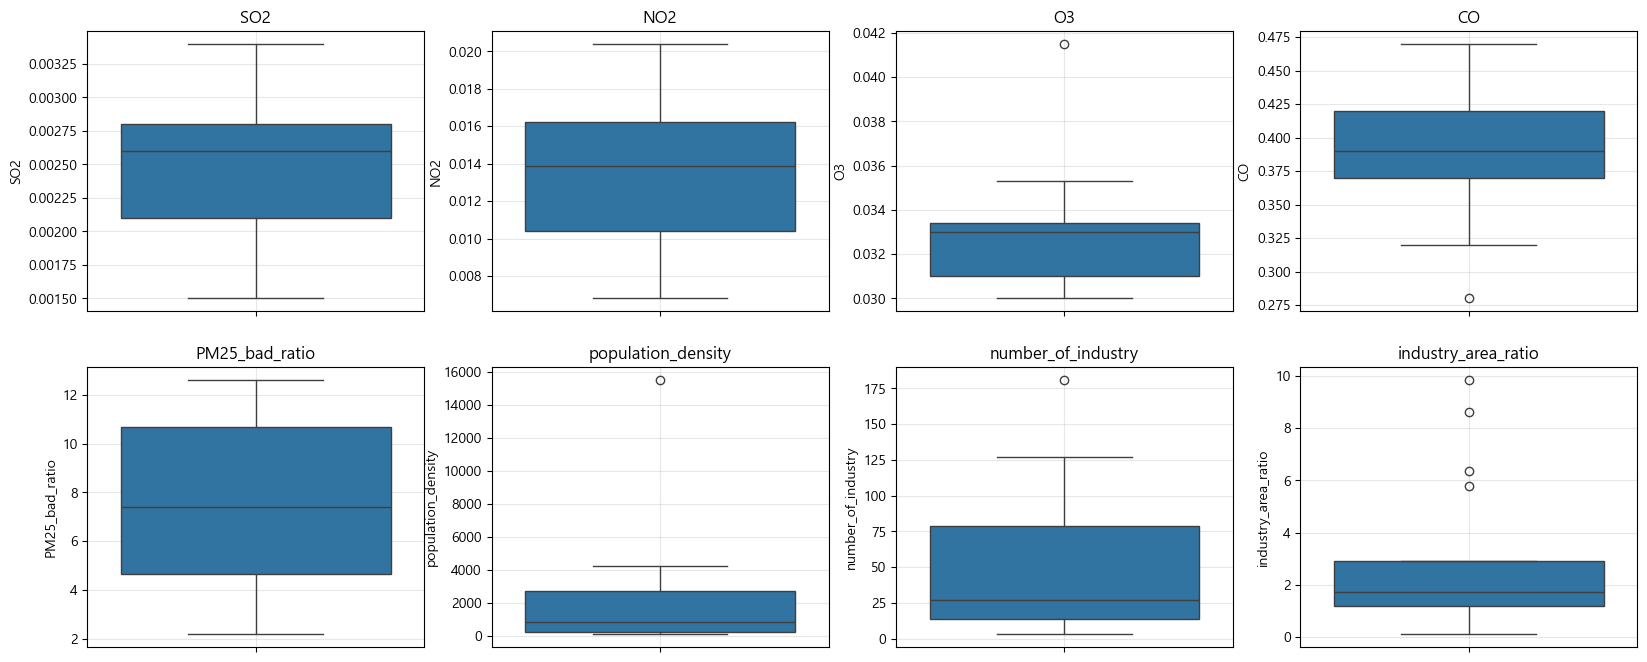

In [10]:
#데이터 이상치 시각화
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()
for i, (col, data) in enumerate(pollution_data[num_cols].items()):
    sns.boxplot(y=data.astype(float), ax=axes[i])
    axes[i].set_title(col)
    axes[i].grid(True, alpha=0.3)

인구밀도 vs 오염물질 농도 시각화 생성 중...


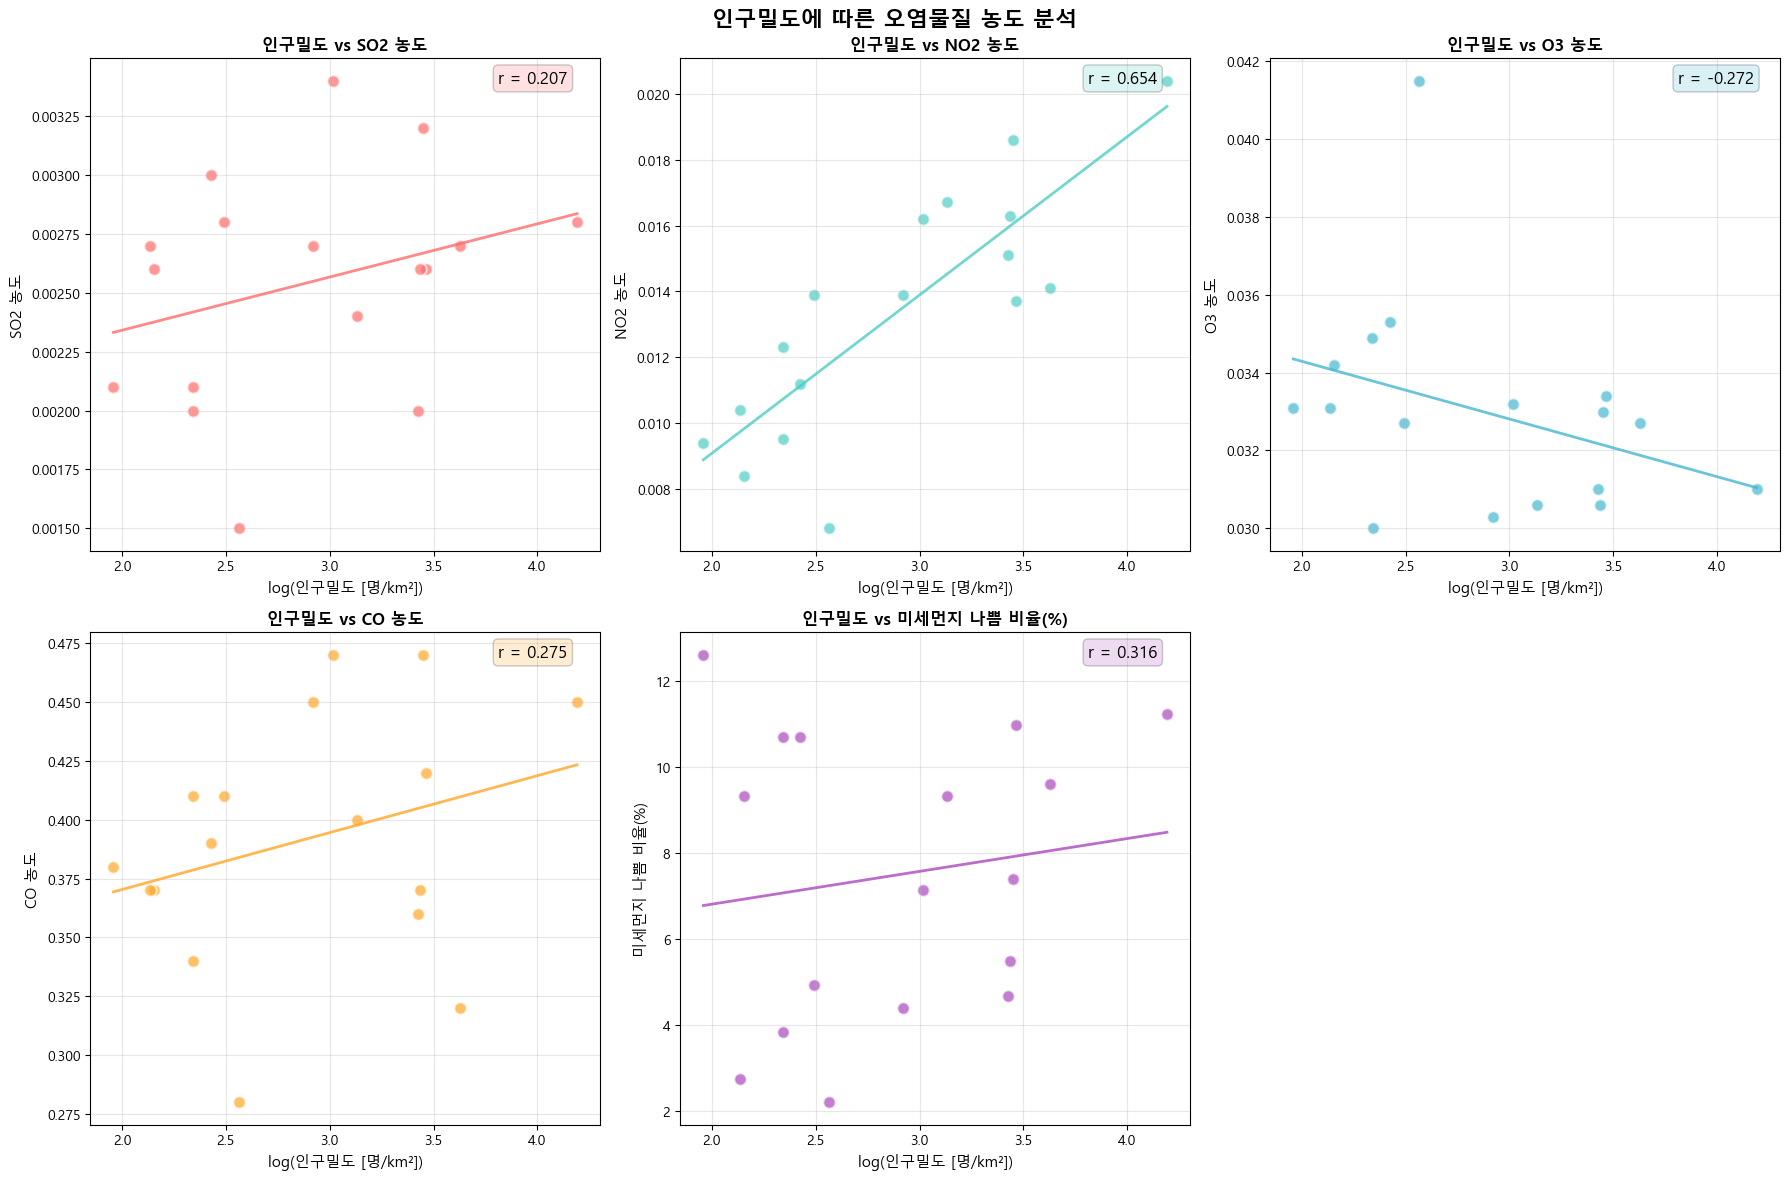

In [18]:
# 7. 인구밀도에 따른 오염물질 농도 시각화
print("인구밀도 vs 오염물질 농도 시각화 생성 중...")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

pollutants = ['SO2', 'NO2', 'O3', 'CO', 'PM25_bad_ratio']
pollutant_names = ['SO2 농도', 'NO2 농도', 'O3 농도', 'CO 농도', '미세먼지 나쁨 비율(%)']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA726', '#AB47BC']

pollution_data['log_population_density'] = np.log10(pollution_data['population_density'])

for i, (pollutant, name, color) in enumerate(zip(pollutants, pollutant_names, colors)):
    ax = axes[i]
    
    sns.regplot(
    x='log_population_density', y=pollutant, data=pollution_data,
    scatter_kws={'s': 80, 'alpha':0.7, 'edgecolor':'white', 'linewidths':1.5, 'color': color},
    line_kws={'color': color, 'alpha':0.8, 'linewidth':2}, ci=None,
    ax=ax
    )

    # 상관계수 계산 및 표시
    correlation = np.corrcoef(pollution_data['population_density'], pollution_data[pollutant])[0, 1]
    ax.text(0.8, 0.95, f'r = {correlation:.3f}', 
            transform=ax.transAxes, fontsize=12, 
            bbox=dict(boxstyle="round,pad=0.3", facecolor=color, alpha=0.2))
    
    ax.set_xlabel('log(인구밀도 [명/km²])', fontsize=11)
    ax.set_ylabel(name, fontsize=11)
    ax.set_title(f'인구밀도 vs {name}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

# 마지막 subplot 제거
axes[5].remove()

plt.suptitle('인구밀도에 따른 오염물질 농도 분석', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

산업단지 면적 비율 vs 오염물질 농도 시각화 생성 중...


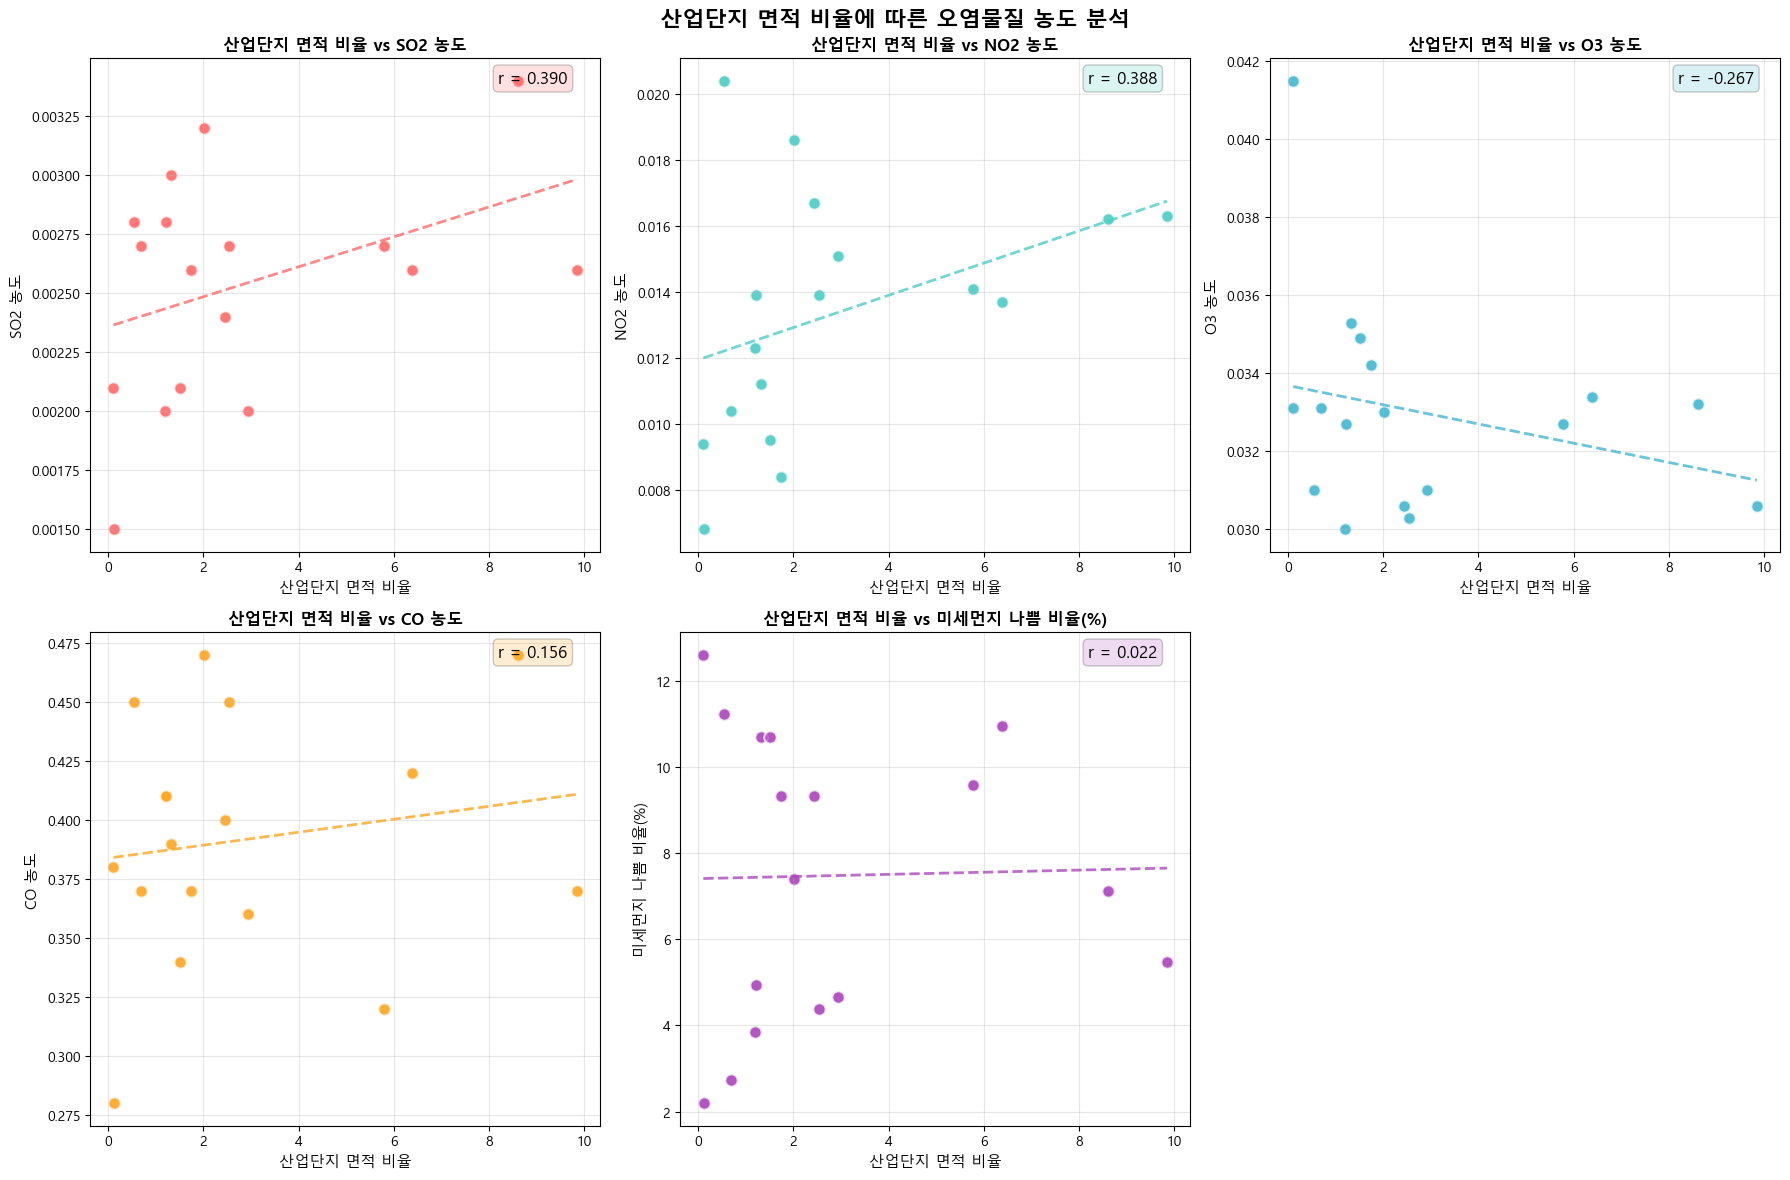

In [12]:
# 8. 산업단지 면적 비율에 따른 오염물질 농도 시각화
print("산업단지 면적 비율 vs 오염물질 농도 시각화 생성 중...")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, (pollutant, name, color) in enumerate(zip(pollutants, pollutant_names, colors)):
    ax = axes[i]
    
    # 산점도
    ax.scatter(pollution_data['industry_area_ratio'], pollution_data[pollutant], 
               alpha=0.7, s=80, c=color, edgecolors='white', linewidth=1.5)
    
    # 추세선
    sns.regplot(
        data=pollution_data, 
        x='industry_area_ratio', 
        y=pollutant,
        scatter=True,
        scatter_kws={'alpha':0.7, 's':80, 'color': color, 'edgecolor': 'white', 'linewidths': 1.5},
        line_kws={'color': color, 'alpha': 0.8, 'linestyle': '--', 'linewidth': 2}, ci=None,
        ax=ax
    )

    # 상관계수 계산 및 표시
    correlation = np.corrcoef(pollution_data['industry_area_ratio'], pollution_data[pollutant])[0, 1]
    ax.text(0.8, 0.95, f'r = {correlation:.3f}', 
            transform=ax.transAxes, fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", facecolor=color, alpha=0.2))
    
    ax.set_xlabel('산업단지 면적 비율', fontsize=11)
    ax.set_ylabel(name, fontsize=11)
    ax.set_title(f'산업단지 면적 비율 vs {name}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

# 마지막 subplot 제거
axes[5].remove()

plt.suptitle('산업단지 면적 비율에 따른 오염물질 농도 분석', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

산업단지 수 vs 오염물질 농도 시각화 생성 중...


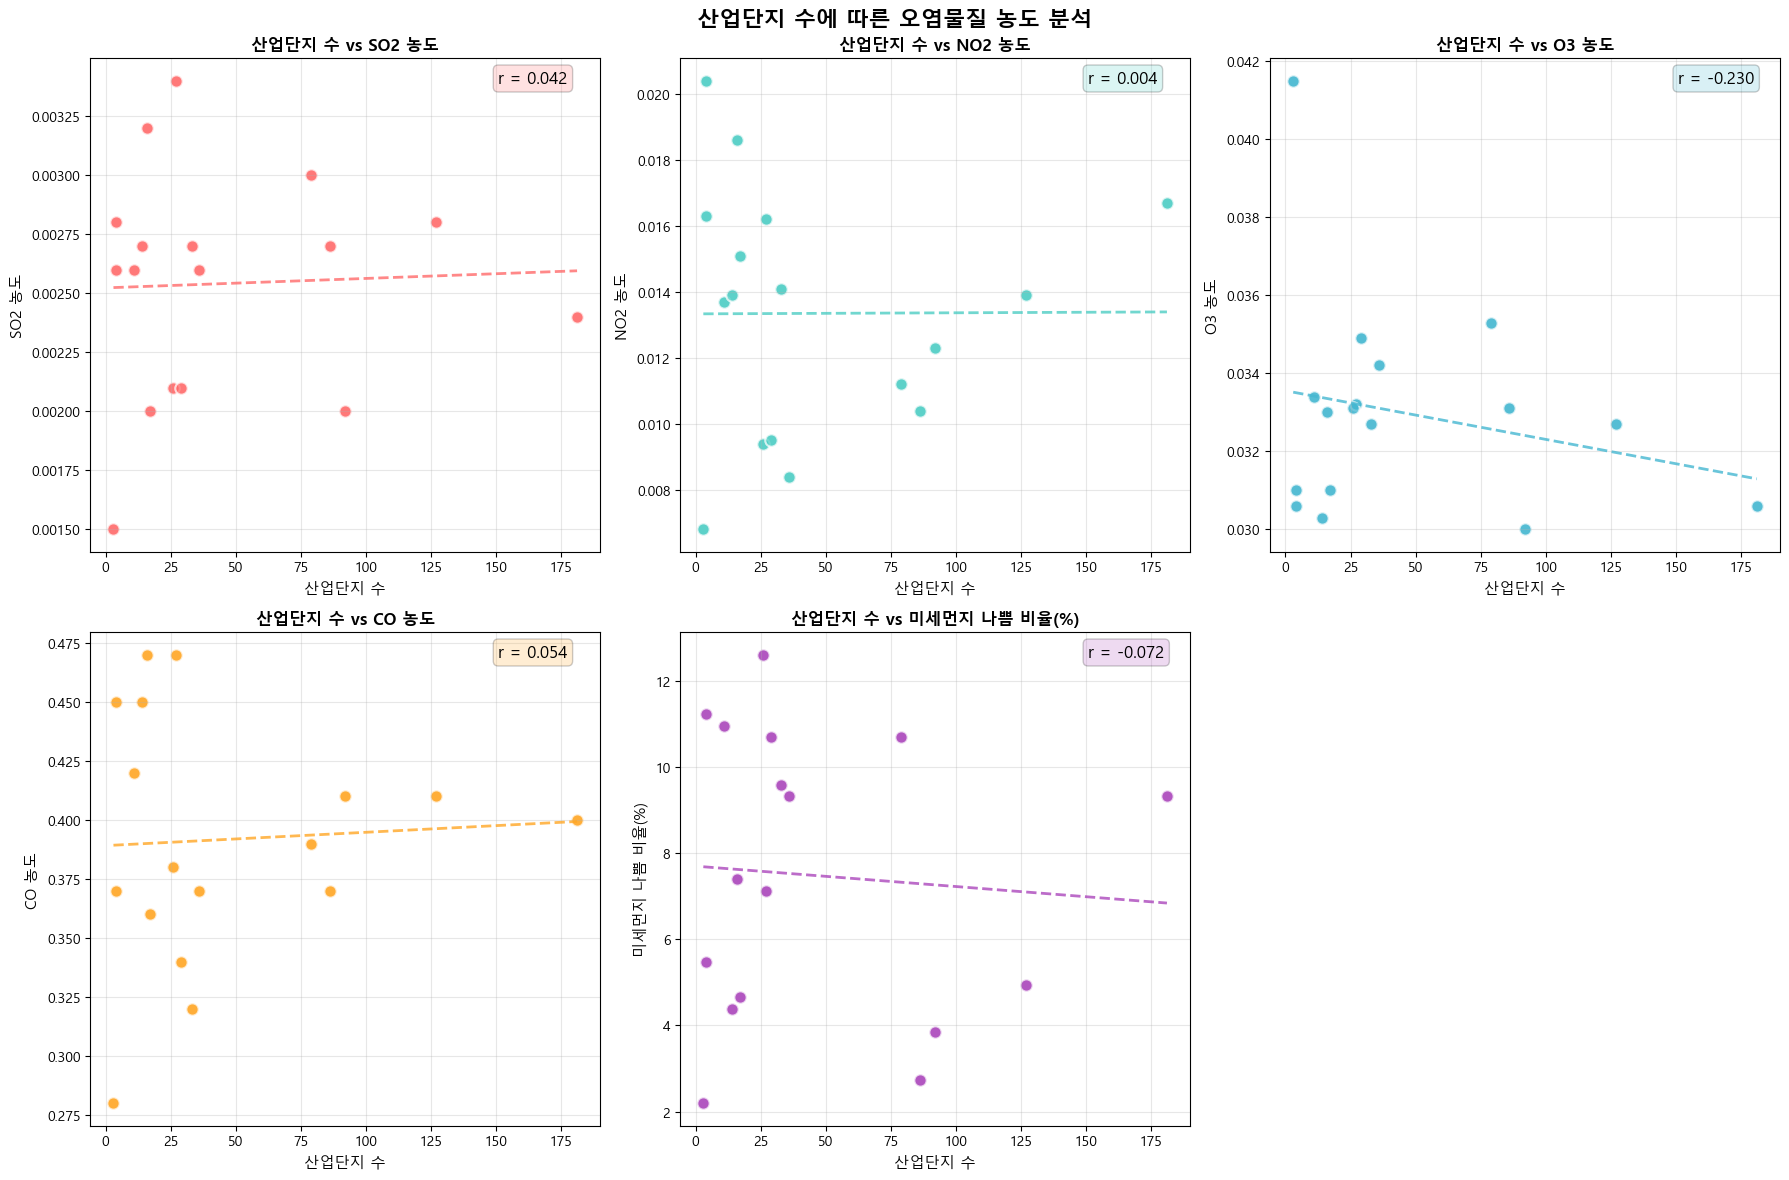

In [13]:
# 9. 산업단지 수에 따른 오염물질 농도 시각화
print("산업단지 수 vs 오염물질 농도 시각화 생성 중...")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, (pollutant, name, color) in enumerate(zip(pollutants, pollutant_names, colors)):
    ax = axes[i]
    
    # 산점도
    ax.scatter(pollution_data['number_of_industry'], pollution_data[pollutant], 
               alpha=0.7, s=80, c=color, edgecolors='white', linewidth=1.5)
    
    # 추세선
    sns.regplot(
        data=pollution_data, 
        x='number_of_industry', 
        y=pollutant,
        scatter=True,
        scatter_kws={'alpha':0.7, 's':80, 'color': color, 'edgecolor': 'white', 'linewidths': 1.5},
        line_kws={'color': color, 'alpha': 0.8, 'linestyle': '--', 'linewidth': 2}, ci=None,
        ax=ax
    )

    # 상관계수 계산 및 표시
    correlation = np.corrcoef(pollution_data['number_of_industry'], pollution_data[pollutant])[0, 1]
    ax.text(0.8, 0.95, f'r = {correlation:.3f}', 
            transform=ax.transAxes, fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", facecolor=color, alpha=0.2))
    
    ax.set_xlabel('산업단지 수', fontsize=11)
    ax.set_ylabel(name, fontsize=11)
    ax.set_title(f'산업단지 수 vs {name}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

# 마지막 subplot 제거
axes[5].remove()

plt.suptitle('산업단지 수에 따른 오염물질 농도 분석', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

산업단지 면적 비율 vs 인구밀도 시각화 생성 중...


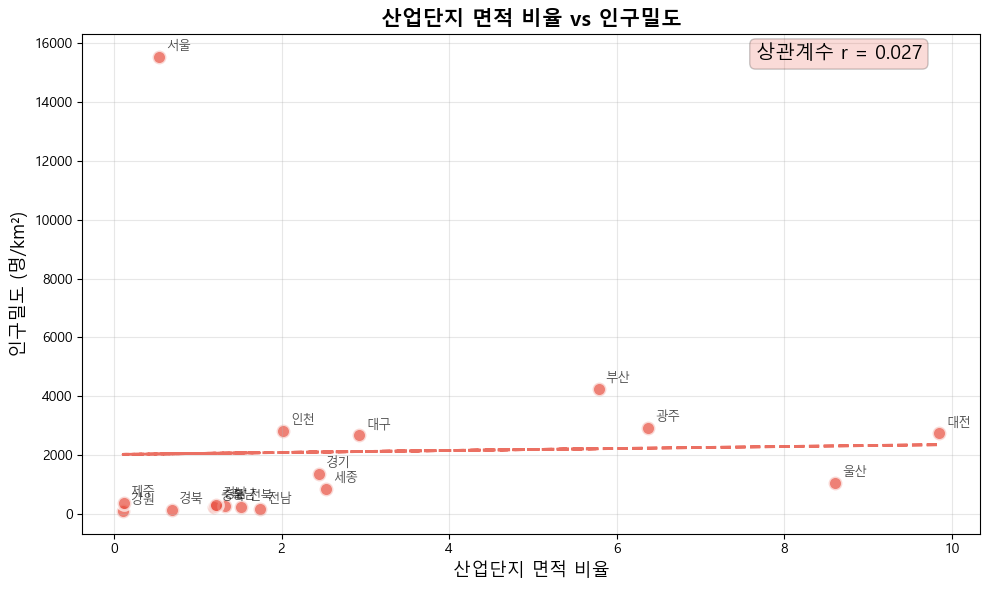

In [14]:
# 10. 산업단지 면적 비율과 인구밀도의 관계
print("산업단지 면적 비율 vs 인구밀도 시각화 생성 중...")

plt.figure(figsize=(10, 6))

# 산점도
plt.scatter(pollution_data['industry_area_ratio'], pollution_data['population_density'], 
           alpha=0.7, s=100, c='#E74C3C', edgecolors='white', linewidth=2)

# 추세선
z = np.polyfit(pollution_data['industry_area_ratio'], pollution_data['population_density'], 1)
p = np.poly1d(z)
plt.plot(pollution_data['industry_area_ratio'], p(pollution_data['industry_area_ratio']), 
        "--", color='#E74C3C', alpha=0.8, linewidth=2)

# 상관계수 계산 및 표시
correlation = np.corrcoef(pollution_data['industry_area_ratio'], pollution_data['population_density'])[0, 1]
plt.text(0.75, 0.95, f'상관계수 r = {correlation:.3f}', 
        transform=plt.gca().transAxes, fontsize=14,
        bbox=dict(boxstyle="round,pad=0.3", facecolor='#E74C3C', alpha=0.2))

# 지역명 표시
for i, region in enumerate(pollution_data['region']):
    plt.annotate(region, 
                (pollution_data['industry_area_ratio'].iloc[i], pollution_data['population_density'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=9, alpha=0.7)

plt.xlabel('산업단지 면적 비율', fontsize=13)
plt.ylabel('인구밀도 (명/km²)', fontsize=13)
plt.title('산업단지 면적 비율 vs 인구밀도', fontsize=15, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

산업단지 수 vs 인구밀도 시각화 생성 중...


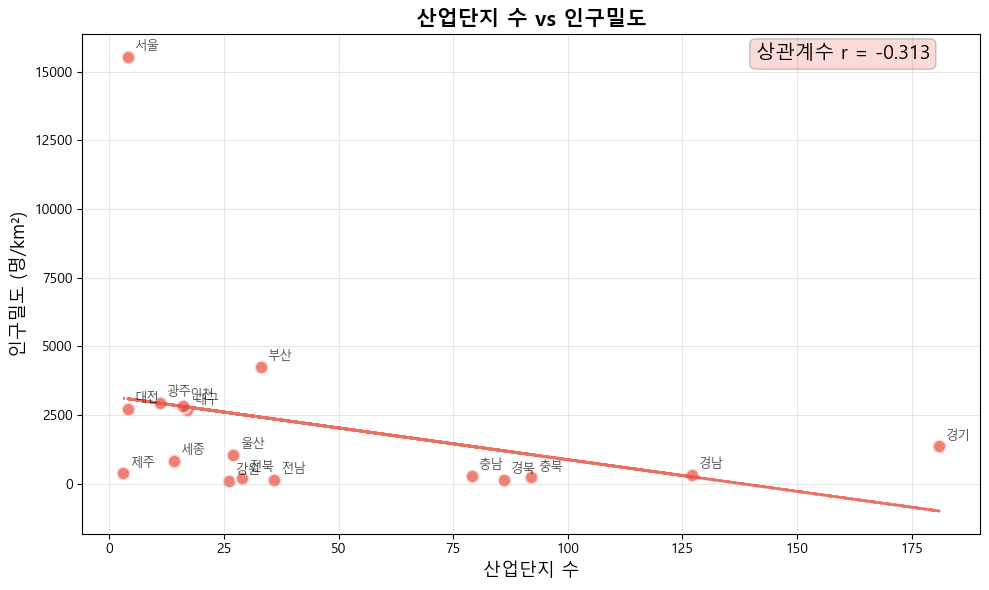

In [15]:
# 11. 산업단지 수과 인구밀도의 관계
print("산업단지 수 vs 인구밀도 시각화 생성 중...")

plt.figure(figsize=(10, 6))

# 산점도
plt.scatter(pollution_data['number_of_industry'], pollution_data['population_density'], 
           alpha=0.7, s=100, c='#E74C3C', edgecolors='white', linewidth=2)

# 추세선
z = np.polyfit(pollution_data['number_of_industry'], pollution_data['population_density'], 1)
p = np.poly1d(z)
plt.plot(pollution_data['number_of_industry'], p(pollution_data['number_of_industry']), 
        "--", color='#E74C3C', alpha=0.8, linewidth=2)

# 상관계수 계산 및 표시
correlation = np.corrcoef(pollution_data['number_of_industry'], pollution_data['population_density'])[0, 1]
plt.text(0.75, 0.95, f'상관계수 r = {correlation:.3f}', 
        transform=plt.gca().transAxes, fontsize=14,
        bbox=dict(boxstyle="round,pad=0.3", facecolor='#E74C3C', alpha=0.2))

# 지역명 표시
for i, region in enumerate(pollution_data['region']):
    plt.annotate(region, 
                (pollution_data['number_of_industry'].iloc[i], pollution_data['population_density'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=9, alpha=0.7)

plt.xlabel('산업단지 수', fontsize=13)
plt.ylabel('인구밀도 (명/km²)', fontsize=13)
plt.title('산업단지 수 vs 인구밀도', fontsize=15, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

상관관계 매트릭스 히트맵 생성 중...


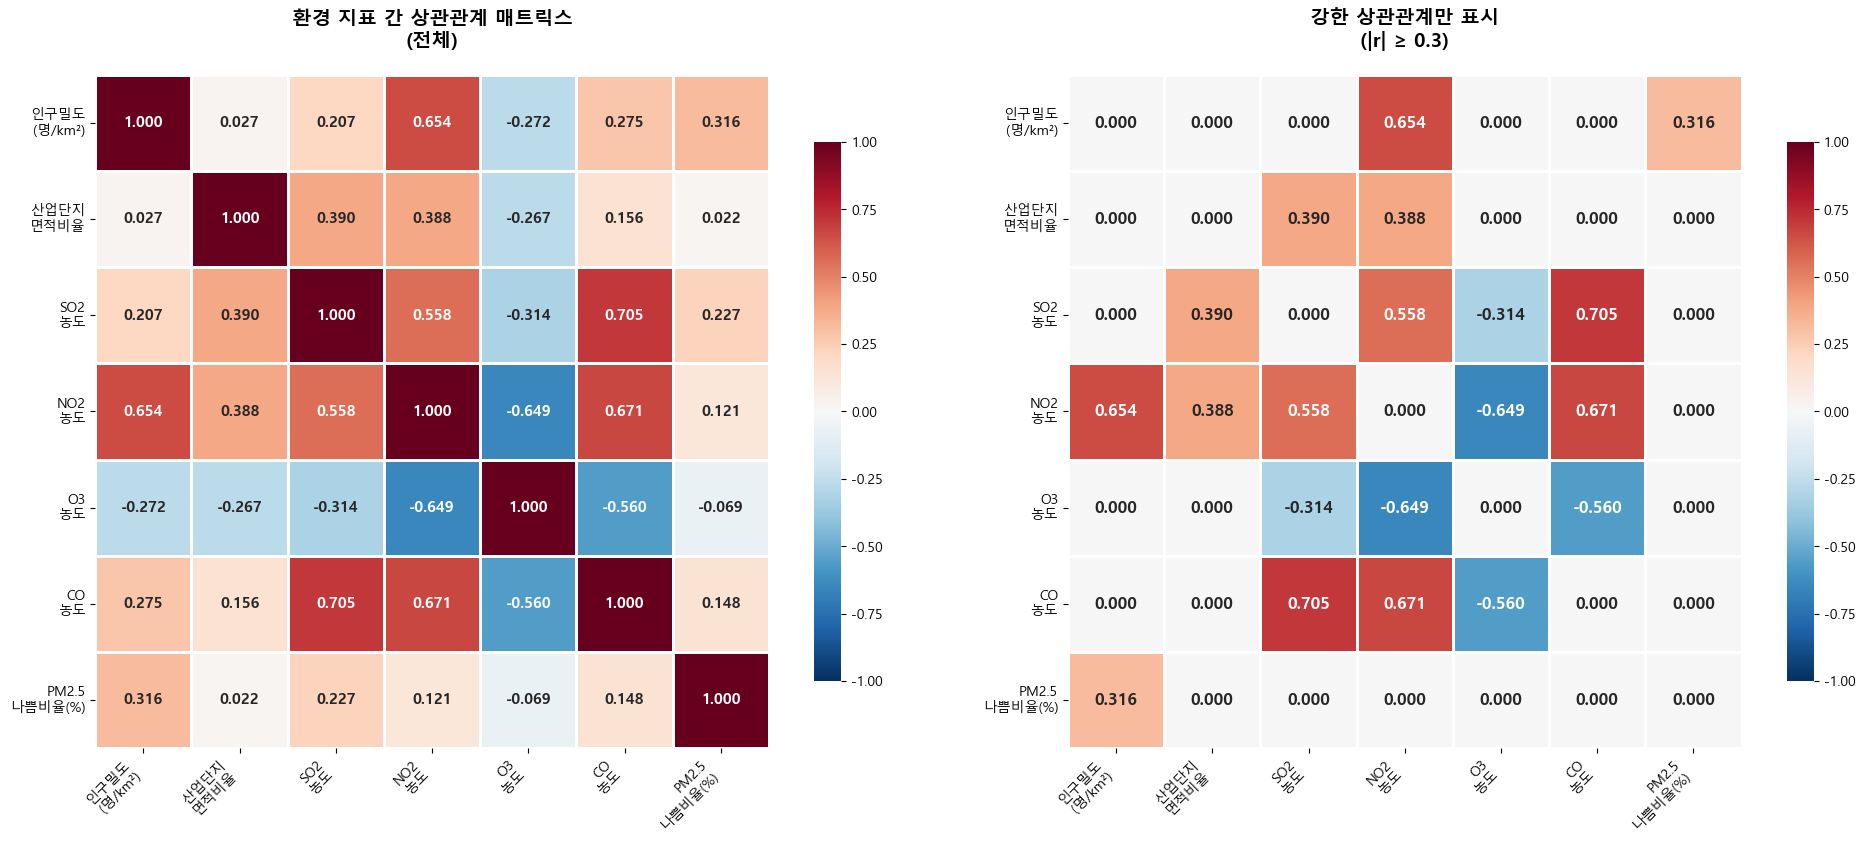


📊 주요 상관관계 분석 결과:

🔥 강한 상관관계 TOP 5:
1. SO2
농도 ↔ CO
농도
   상관계수: 0.705 (양의 상관관계, 매우 강함)
   → SO2이/가 높을수록 CO도/이 높아짐

2. NO2
농도 ↔ CO
농도
   상관계수: 0.671 (양의 상관관계, 강함)
   → NO2이/가 높을수록 CO도/이 높아짐

3. 인구밀도
(명/km²) ↔ NO2
농도
   상관계수: 0.654 (양의 상관관계, 강함)
   → 인구밀도이/가 높을수록 NO2도/이 높아짐

4. NO2
농도 ↔ O3
농도
   상관계수: -0.649 (음의 상관관계, 강함)
   → NO2이/가 높을수록 O3는/이 낮아짐

5. O3
농도 ↔ CO
농도
   상관계수: -0.560 (음의 상관관계, 강함)
   → O3이/가 높을수록 CO는/이 낮아짐


📈 상관관계 강도 해석:
• |r| ≥ 0.7: 매우 강한 상관관계
• 0.5 ≤ |r| < 0.7: 강한 상관관계
• 0.3 ≤ |r| < 0.5: 보통 상관관계
• |r| < 0.3: 약한 상관관계

🎯 정책적 시사점:
• SO2
농도와/과 CO
농도 간의 강한 양의 상관관계 확인
  → 두 요인을 함께 고려한 통합적 정책 수립 필요


In [16]:
# 11. 전체 변수 간 상관관계 매트릭스 (개선된 버전)
print("상관관계 매트릭스 히트맵 생성 중...")

# 분석할 변수들 선택
analysis_data = pollution_data[['population_density', 'industry_area_ratio', 
                               'SO2', 'NO2', 'O3', 'CO', 'PM25_bad_ratio']].copy()

# 변수명 한글로 변경 (더 명확하게)
analysis_data.columns = ['인구밀도\n(명/km²)', '산업단지\n면적비율', 'SO2\n농도', 'NO2\n농도', 
                        'O3\n농도', 'CO\n농도', 'PM2.5\n나쁨비율(%)']

# 상관계수 계산
correlation_matrix = analysis_data.corr()

# 그림 크기 더 크게
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# 1. 전체 상관관계 히트맵 (개선된 버전)
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
            square=True, linewidths=2, cbar_kws={"shrink": .8}, 
            fmt='.3f', annot_kws={'fontsize': 11, 'weight': 'bold'},
            ax=ax1, vmin=-1, vmax=1)

ax1.set_title('환경 지표 간 상관관계 매트릭스\n(전체)', fontsize=14, fontweight='bold', pad=20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=10)
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0, fontsize=10)

# 2. 강한 상관관계만 표시 (절댓값 0.3 이상)
strong_corr = correlation_matrix.copy()
mask_weak = np.abs(strong_corr) < 0.3
strong_corr[mask_weak] = 0

# 대각선 제거
mask_diag = np.eye(strong_corr.shape[0], dtype=bool)
strong_corr[mask_diag] = 0

sns.heatmap(strong_corr, annot=True, cmap='RdBu_r', center=0,
            square=True, linewidths=2, cbar_kws={"shrink": .8}, 
            fmt='.3f', annot_kws={'fontsize': 12, 'weight': 'bold'},
            ax=ax2, vmin=-1, vmax=1)

ax2.set_title('강한 상관관계만 표시\n(|r| ≥ 0.3)', fontsize=14, fontweight='bold', pad=20)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=10)
ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0, fontsize=10)

plt.tight_layout()
plt.show()

# 3. 상관관계 순위표 생성
print("\n📊 주요 상관관계 분석 결과:")
print("=" * 60)

# 상관계수를 리스트로 변환 (대각선 제외)
corr_pairs = []
n = len(correlation_matrix.columns)
for i in range(n):
    for j in range(i+1, n):
        var1 = correlation_matrix.columns[i]
        var2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]
        corr_pairs.append((var1, var2, corr_value))

# 절댓값 기준으로 정렬
corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

print("\n🔥 강한 상관관계 TOP 5:")
for i, (var1, var2, corr) in enumerate(corr_pairs[:5]):
    direction = "양의" if corr > 0 else "음의"
    strength = "매우 강함" if abs(corr) >= 0.7 else "강함" if abs(corr) >= 0.5 else "보통"
    print(f"{i+1}. {var1} ↔ {var2}")
    print(f"   상관계수: {corr:.3f} ({direction} 상관관계, {strength})")
    
    if abs(corr) >= 0.5:
        if corr > 0:
            print(f"   → {var1.split()[0]}이/가 높을수록 {var2.split()[0]}도/이 높아짐")
        else:
            print(f"   → {var1.split()[0]}이/가 높을수록 {var2.split()[0]}는/이 낮아짐")
    print()

print("\n📈 상관관계 강도 해석:")
print("• |r| ≥ 0.7: 매우 강한 상관관계")
print("• 0.5 ≤ |r| < 0.7: 강한 상관관계") 
print("• 0.3 ≤ |r| < 0.5: 보통 상관관계")
print("• |r| < 0.3: 약한 상관관계")

print("\n🎯 정책적 시사점:")
# 가장 강한 상관관계 기반으로 시사점 제시
if corr_pairs:
    top_corr = corr_pairs[0]
    if abs(top_corr[2]) >= 0.5:
        if top_corr[2] > 0:
            print(f"• {top_corr[0]}와/과 {top_corr[1]} 간의 강한 양의 상관관계 확인")
            print(f"  → 두 요인을 함께 고려한 통합적 정책 수립 필요")
        else:
            print(f"• {top_corr[0]}와/과 {top_corr[1]} 간의 강한 음의 상관관계 확인") 
            print(f"  → 상호 상쇄 효과를 활용한 정책 전략 고려")

지역별 종합 분석 차트 생성 중...


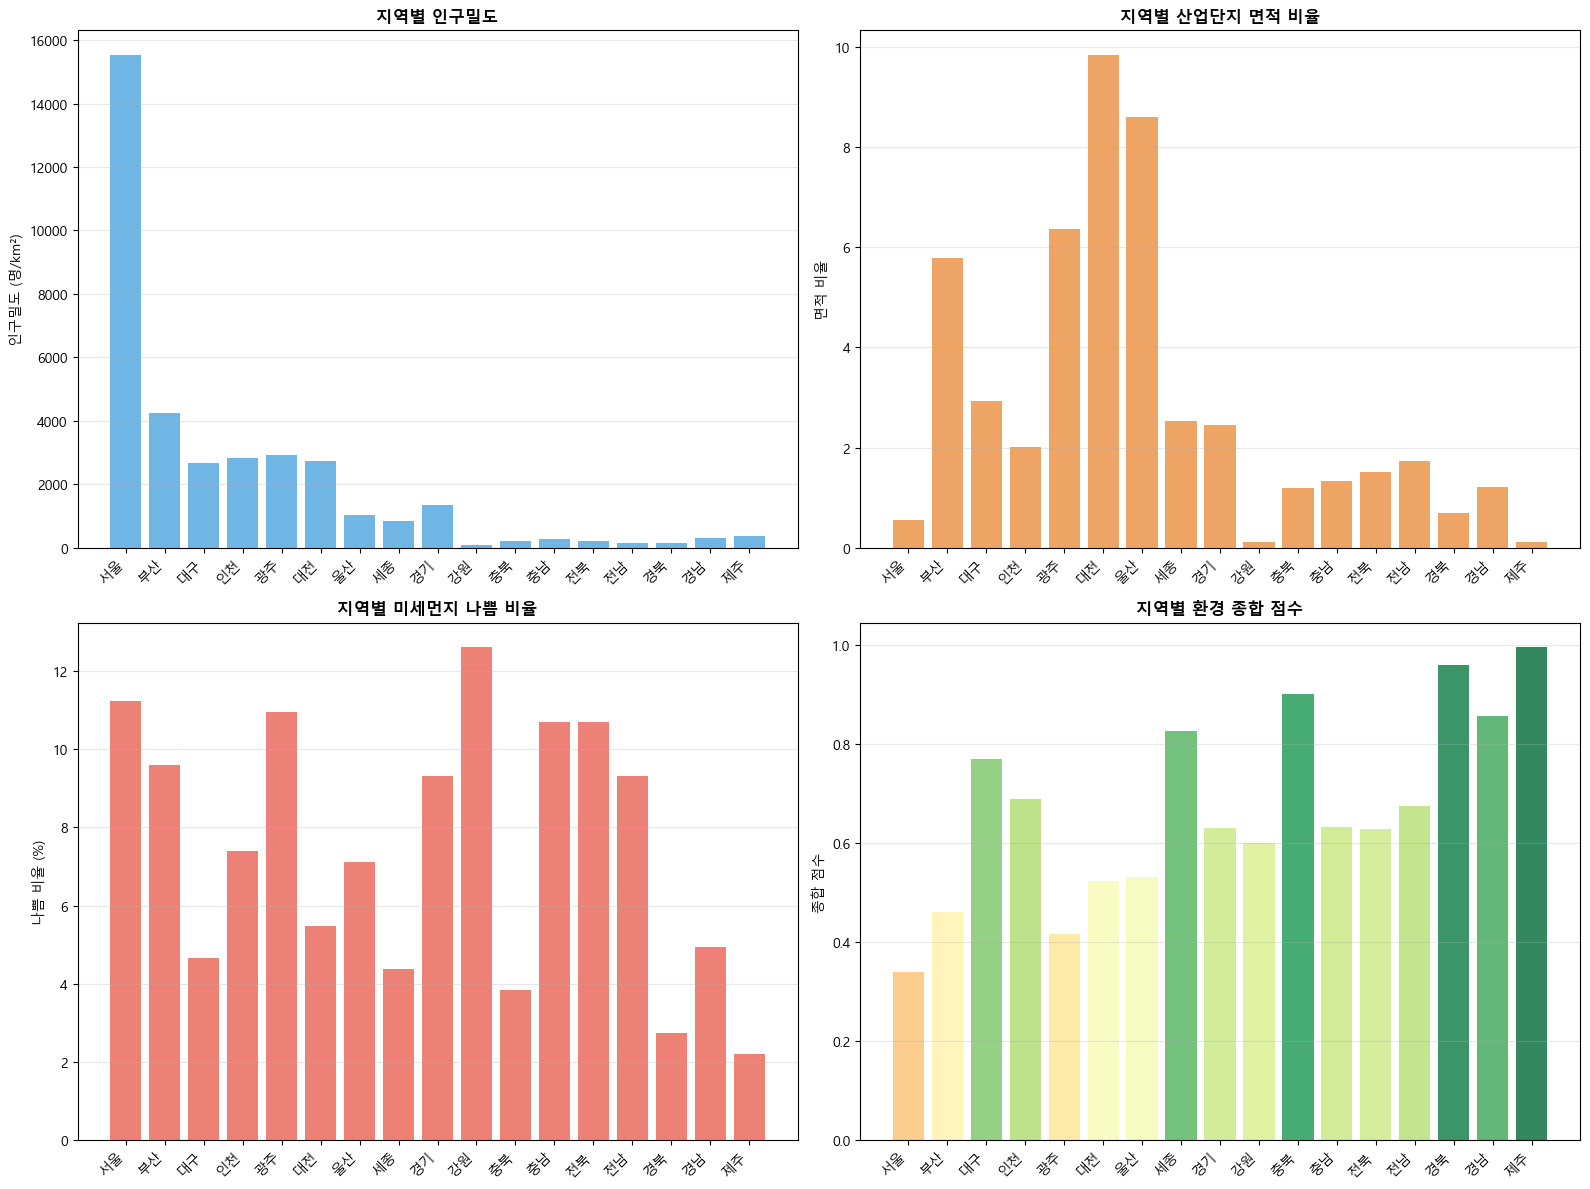

In [46]:
# 12. 지역별 종합 분석
print("지역별 종합 분석 차트 생성 중...")

# 4개의 차트를 2x2 레이아웃으로 생성
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. 지역별 인구밀도
ax1 = axes[0, 0]
x_pos = np.arange(len(pollution_data['region']))
ax1.bar(x_pos, pollution_data['population_density'], color='#3498DB', alpha=0.7)
ax1.set_title('지역별 인구밀도', fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(pollution_data['region'], rotation=45, ha='right')
ax1.set_ylabel('인구밀도 (명/km²)')
ax1.grid(axis='y', alpha=0.3)

# 2. 지역별 산업단지 면적 비율
ax2 = axes[0, 1]
ax2.bar(x_pos, pollution_data['industry_area_ratio'], color='#E67E22', alpha=0.7)
ax2.set_title('지역별 산업단지 면적 비율', fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(pollution_data['region'], rotation=45, ha='right')
ax2.set_ylabel('면적 비율')
ax2.grid(axis='y', alpha=0.3)

# 3. 지역별 미세먼지 나쁨 비율
ax3 = axes[1, 0]
ax3.bar(x_pos, pollution_data['PM25_bad_ratio'], color='#E74C3C', alpha=0.7)
ax3.set_title('지역별 미세먼지 나쁨 비율', fontweight='bold')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(pollution_data['region'], rotation=45, ha='right')
ax3.set_ylabel('나쁨 비율 (%)')
ax3.grid(axis='y', alpha=0.3)

# 4. 종합 환경 점수
ax4 = axes[1, 1]
# 지표 정규화 및 가중평균 계산
scores = []
for idx, row in pollution_data.iterrows():
    pop_norm = (row['population_density'] - pollution_data['population_density'].min()) / (pollution_data['population_density'].max() - pollution_data['population_density'].min())
    ind_norm = (row['industry_area_ratio'] - pollution_data['industry_area_ratio'].min()) / (pollution_data['industry_area_ratio'].max() - pollution_data['industry_area_ratio'].min())
    pm_norm = (row['PM25_bad_ratio'] - pollution_data['PM25_bad_ratio'].min()) / (pollution_data['PM25_bad_ratio'].max() - pollution_data['PM25_bad_ratio'].min())
    scores.append(1 - (pop_norm * 0.3 + ind_norm * 0.3 + pm_norm * 0.4))
scores_color = [1-x for x in scores]
ax4.bar(x_pos, scores, color=plt.cm.RdYlGn_r(scores_color), alpha=0.8)
ax4.set_title('지역별 환경 종합 점수', fontweight='bold')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(pollution_data['region'], rotation=45, ha='right')
ax4.set_ylabel('종합 점수')
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 📊 분석 결과 요약

### 주요 발견사항

1. **인구밀도와 오염물질의 관계**
   - 인구밀도가 높은 지역일수록 대기오염 수준이 높은 경향
   - 특히 서울, 부산 등 대도시 지역에서 뚜렷한 패턴 관찰

2. **산업단지와 오염물질의 관계**
   - 산업단지 면적 비율과 특정 오염물질 간에 상관관계 존재
   - 지역별로 산업 특성에 따른 차이 발생


### 정책적 시사점

- **도시계획**: 인구 집중도와 환경 영향을 고려한 균형 잡힌 도시 개발 필요
- **산업정책**: 환경친화적 산업단지 조성 및 기존 단지의 환경 개선 방안 모색
- **환경관리**: 지역별 특성을 고려한 맞춤형 환경 정책 수립 필요